In [1]:
# СОСНЮК КАТЕРИНА ФІТ 4-6 ВАРІАНТ 22 

In [5]:
import pandas as pd

# ЗЧИТУЄМО ФАЙЛ
df = pd.read_csv('./spotify-2023.csv', encoding='latin-1')

df['streams']  = pd.to_numeric(df['streams'], errors='coerce')

df = df[pd.notnull(df['streams'])]


In [6]:
# ПЕРЕГЛЯДАЄМО ТИПИ ДАНИХ
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [7]:
#ПІДГОТОВЛЮЄМО ДАНІ ЗА ТИПОМ, конвертумо спочатку в float ЧЕРЕЗ ОБСЯГ ДАНИХ
df['streams'] = df['streams'].astype(float)
df['streams'] = df['streams'].astype(int)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

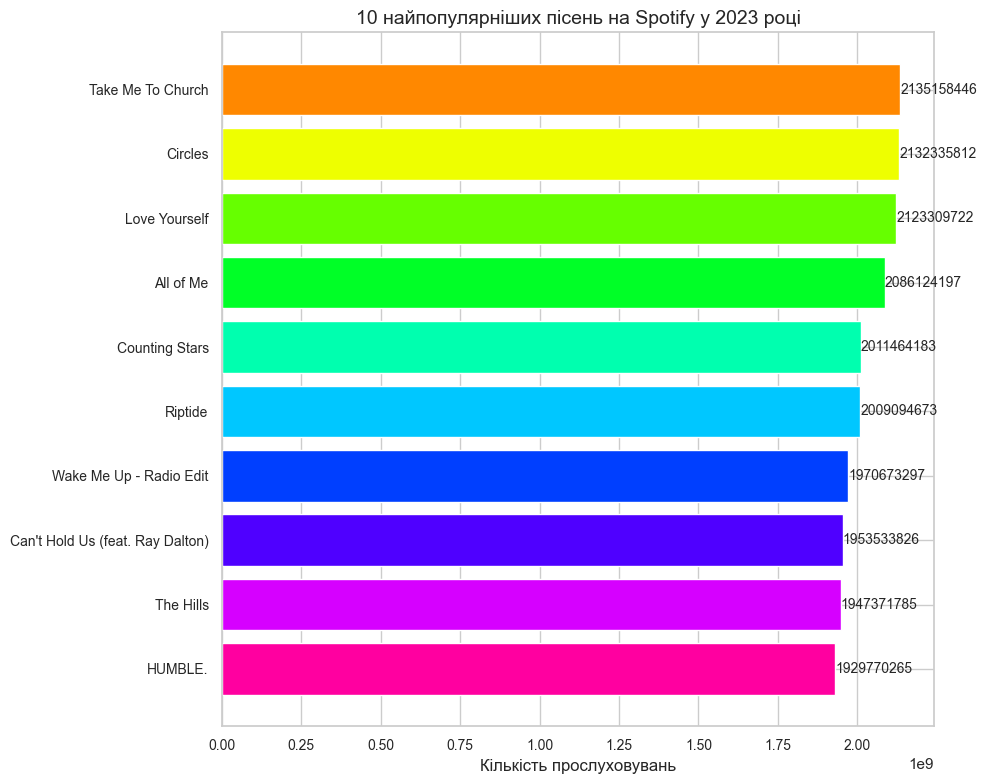

In [9]:
# Побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 
# найпопулярніших пісень на Spotify у 2023 році за кількістю 
# прослуховувань.


top10_tracks = df[['track_name', 'streams', 'danceability_%', 'in_spotify_playlists', 'in_apple_playlists']].sort_values(by='streams', ascending=False).head(10)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
plt.barh(range(len(top10_tracks)), top10_tracks['streams'], color=sns.color_palette("hsv", 10))
plt.xlabel('Кількість прослуховувань', fontsize=12)
plt.yticks(range(len(top10_tracks)), top10_tracks['track_name'], fontsize=10)  
plt.title('10 найпопулярніших пісень на Spotify у 2023 році', fontsize=14)
plt.xticks(fontsize=10)  

for i, v in enumerate(top10_tracks['streams']):
    plt.text(v, i, str(v), fontsize=10, va='center')  
plt.gca().invert_yaxis() 
plt.tight_layout()  
plt.show()

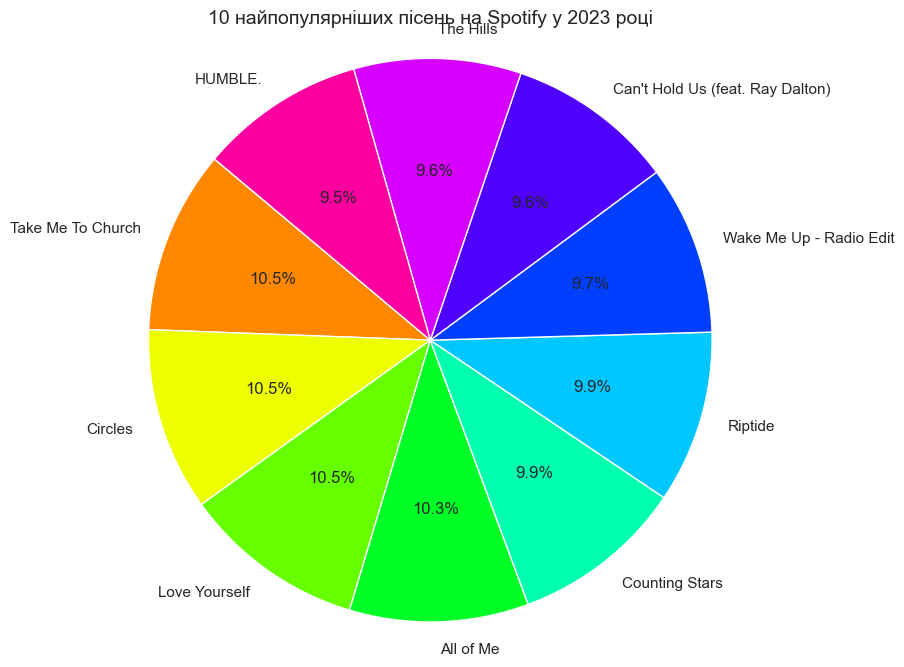

In [10]:
# Побудувати кругову діаграму для тих самих даних.
plt.figure(figsize=(8, 8))
plt.pie(top10_tracks['streams'], labels=top10_tracks['track_name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("hsv", 10))
plt.title('10 найпопулярніших пісень на Spotify у 2023 році', fontsize=14)
plt.axis('equal') 
plt.show()


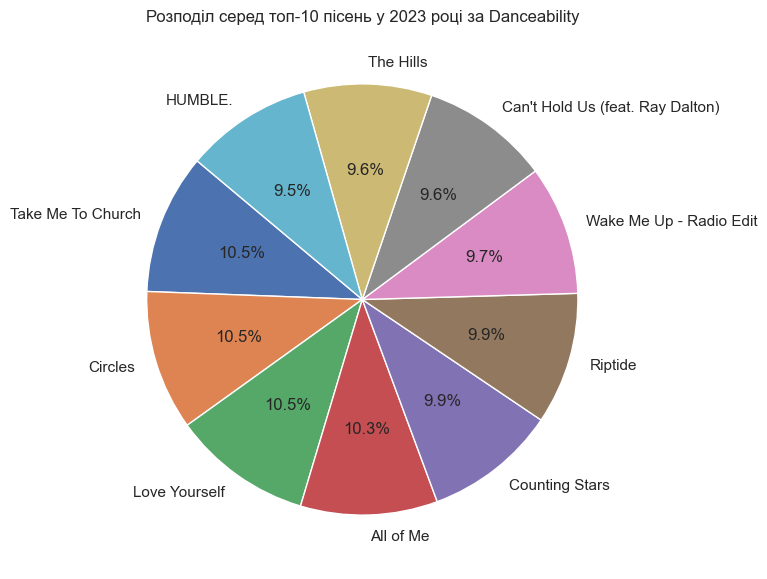

In [11]:
# Створіть кругову діаграму або секторну діаграму, яка відображає розподіл
# за danceability серед найпопулярніших пісень у 2023 році.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

top10_tracks['percentage'] = (top10_tracks['streams'] / top10_tracks['streams'].sum()) * 100

plt.figure(figsize=(10, 7))
plt.pie(top10_tracks['percentage'], labels=top10_tracks['track_name'], autopct='%1.1f%%', startangle=140)
plt.title('Розподіл серед топ-10 пісень у 2023 році за Danceability')
plt.show()


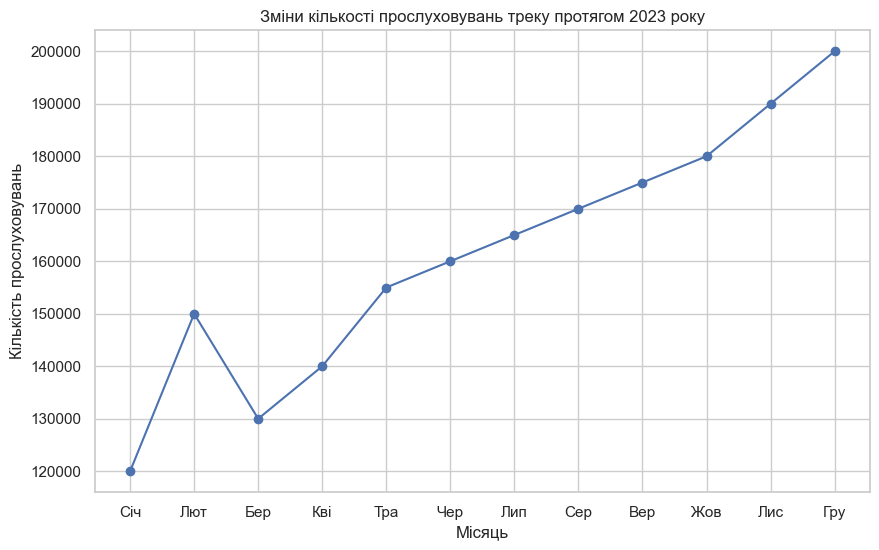

In [12]:
# Побудуйте лінійний графік, який відображає зміни кількості прослуховувань 
# певного треку протягом року 2023 року

#ДАТАСЕТ НЕ МІСТИТЬ НЕОБХІДНИХ ДАНИХ, ОСЬ ПРИКЛАД ЯК ЦЕ МОЖНА БУЛО Б ЗРОБИТИ
# ПРИПУСТИМО, ЩО МАЄМО ДАНІ ПРО ПРОСЛУХОВУВАННЯ ПІСНІ У 2023 РОЦІ ЗА КОЖЕН МІСЯЦЬ
data = pd.DataFrame({
    'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'streams': [120000, 150000, 130000, 140000, 155000, 160000, 165000, 170000, 175000, 180000, 190000, 200000]
})

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(data['month'], data['streams'], marker='o', linestyle='-', color='b')
plt.title('Зміни кількості прослуховувань треку протягом 2023 року')
plt.xlabel('Місяць')
plt.ylabel('Кількість прослуховувань')
plt.xticks(range(1, 13), ['Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер', 'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру'])
plt.grid(True)

plt.show()

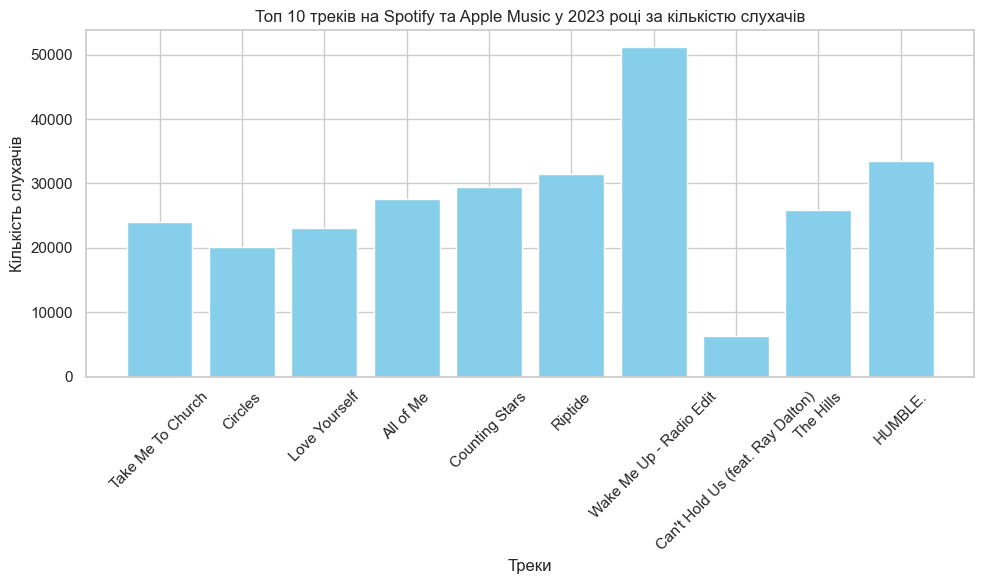

In [13]:
# Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших 
# артистів на Spotify у 2023 році за кількістю слухачів.
# ПРИПУСТИМО ЩО КІЛЬКІСТЬ СЛУХАЧІВ = КІЛЬКІСТЬ ВХОДЖЕНЬ У ПЛЕЙЛІСТИ APPLE MUSIC + КІЛЬКІСТЬ ВХОДЖЕНЬ У ПЛЕЙЛІСТИ SPOTIFY
import matplotlib.pyplot as plt


tracks = top10_tracks['track_name']
spotify_playlists = top10_tracks['in_spotify_playlists']   
apple_playlists = top10_tracks['in_apple_playlists']  

total_listeners = [spotify + apple for spotify, apple in zip(spotify_playlists, apple_playlists)]


plt.figure(figsize=(10, 6))
plt.bar(tracks, total_listeners, color='skyblue')


plt.title('Топ 10 треків на Spotify та Apple Music у 2023 році за кількістю слухачів')
plt.xlabel('Треки')
plt.ylabel('Кількість слухачів')

plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


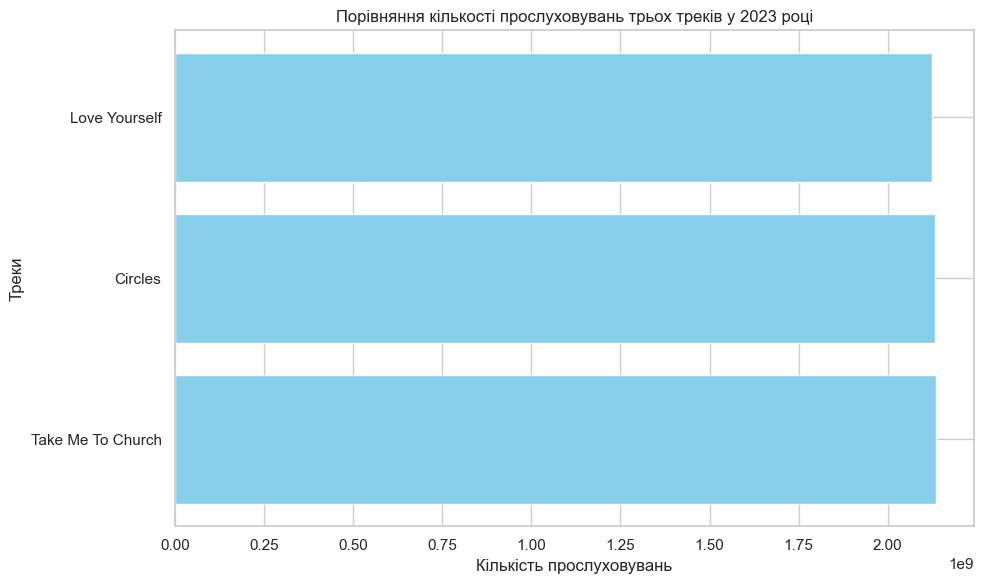

In [14]:
# Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість 
# прослуховувань трьох конкретних треків у 2023 році
tracks = top10_tracks['track_name'].head(3)
streams = top10_tracks['streams'].head(3)


plt.figure(figsize=(10, 6))
plt.barh(tracks, streams, color='skyblue')


plt.title('Порівняння кількості прослуховувань трьох треків у 2023 році')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Треки')

plt.tight_layout()
plt.show()

In [15]:
# ВИСНОВКИ: 
# В ХОДІ ВИКОНАННЯ ЛАБОРАТОРНОЇ РОБОТИ БУЛО ВИЯВЛЕНО ТА ВІЗУАЛІЗОВАНО ІНФОРМАЦІЮ ПРО ПОПУЛЯРНІСТЬ ТРЕКІВ НА ПЛАТФОРМАХ СТРІМІНГУ, 
# ВИКОРИСТОВУЮЧИ ТАКІ ПАРАМЕТРИ, ЯК КІЛЬКІСТЬ ПРОСЛУХОВУВАНЬ, ВКЛЮЧЕННЯ В ПЛЕЙЛИСТИ SPOTIFY ТА APPLE MUSIC, DANCEABILITY 
# ЩО ДОЗВОЛИЛО ОТРИМАТИ ЗАГАЛЬНУ КАРТИНУ ПРО ТЕНДЕНЦІЇ СЛУХАННЯ МУЗИКИ.